In [506]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D,Dropout,Input,Activation,BatchNormalization,SimpleRNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from numpy import unique
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer
from sklearn.model_selection import GridSearchCV

In [507]:
dataset = pd.read_csv('../input/rainfall-prediction/dataset1.csv')

In [508]:
dataset

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


In [509]:
 dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [510]:
# remove attribute 'day'
dataset.drop(['day'],axis=1,inplace=True)
dataset.shape

(366, 11)

In [511]:
dataset['rainfall'].value_counts()

yes    249
no     117
Name: rainfall, dtype: int64

In [512]:
multi_label = pd.DataFrame(dataset.rainfall)
le = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le.fit_transform)
dataset['rainfall'] = enc_label
dataset

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...
361,1022.7,18.8,17.7,16.9,15.0,84,90,1,0.0,30.0,18.4
362,1026.6,18.6,17.3,16.3,12.8,75,85,1,1.0,20.0,25.9
363,1025.9,18.9,17.7,16.4,13.3,75,78,1,4.6,70.0,33.4
364,1025.3,19.2,17.3,15.2,13.3,78,86,1,1.2,20.0,20.9


In [513]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pressure                366 non-null    float64
 1   maxtemp                 366 non-null    float64
 2   temparature             366 non-null    float64
 3   mintemp                 366 non-null    float64
 4   dewpoint                366 non-null    float64
 5   humidity                366 non-null    int64  
 6   cloud                   366 non-null    int64  
 7   rainfall                366 non-null    int64  
 8   sunshine                366 non-null    float64
 9            winddirection  365 non-null    float64
 10  windspeed               365 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 31.6 KB


In [514]:
dataset['windspeed'] = dataset['windspeed'].fillna(0)

In [515]:
dataset['         winddirection'] = dataset['         winddirection'].fillna(0)

In [516]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pressure                366 non-null    float64
 1   maxtemp                 366 non-null    float64
 2   temparature             366 non-null    float64
 3   mintemp                 366 non-null    float64
 4   dewpoint                366 non-null    float64
 5   humidity                366 non-null    int64  
 6   cloud                   366 non-null    int64  
 7   rainfall                366 non-null    int64  
 8   sunshine                366 non-null    float64
 9            winddirection  366 non-null    float64
 10  windspeed               366 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 31.6 KB


In [517]:
y_train= dataset[['rainfall']]
X_train= dataset.drop(labels=['rainfall'], axis=1)

print('X_train has shape:',X_train.shape,'\ny_train has shape:',y_train.shape)

X_train has shape: (366, 10) 
y_train has shape: (366, 1)


In [518]:
y=y_train
x=X_train

In [519]:
dataset['rainfall'].value_counts()

1    249
0    117
Name: rainfall, dtype: int64

In [520]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
 
 

In [521]:
y=np.array(y, dtype=np.int64)
x=np.array(x, dtype=np.int64)
 

In [522]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [523]:
counter = Counter(y)
print(counter) 

Counter({1: 249, 0: 249})


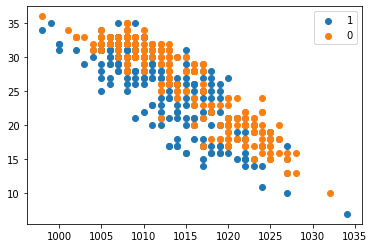

In [524]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(x[row_ix, 0], x[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [525]:
X_train=np.array(x)
y_train=np.array(y)
 

In [526]:
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=42)


In [527]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [528]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(398, 10, 1)

In [529]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(100, 10, 1)

In [530]:
 dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pressure                366 non-null    float64
 1   maxtemp                 366 non-null    float64
 2   temparature             366 non-null    float64
 3   mintemp                 366 non-null    float64
 4   dewpoint                366 non-null    float64
 5   humidity                366 non-null    int64  
 6   cloud                   366 non-null    int64  
 7   rainfall                366 non-null    int64  
 8   sunshine                366 non-null    float64
 9            winddirection  366 non-null    float64
 10  windspeed               366 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 31.6 KB


In [531]:
#def create_model():    
 #   model = Sequential()
  #  model.add(SimpleRNN(128, input_shape= (X_train.shape[1], 1), activation='relu'))
   # model.add(BatchNormalization())
    #model.add(Dropout(.2))
    #model.add(Dense(units= 100,activation='relu' ))
    #model.add(BatchNormalization())
    #model.add(Dropout(.2))
   # model.add(Dense(units= 20,activation='relu' ))
    #model.add(Dropout(.2))
    

    
   # model.add(Dense(units= 1,activation='sigmoid' ))
    #model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
    #model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics=['accuracy'])
    #return model      

In [532]:
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
#model= model.compile(loss="binary_crossentropy", metrics=['accuracy'])
#model = KerasClassifier(create_model, verbose=0, )


In [533]:
#batch_size = [5,10, 20]
#epochs = [100,120,150]
#optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
#param_grid = dict(batch_size=batch_size,epochs=epochs)
#grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
#grid_result = grid.fit(X_train, y_train,validation_data=(X_test, y_test))
# summarize results
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
 #   print("%f (%f) with: %r" % (mean, stdev, param))

In [534]:
    model = Sequential()
    model.add(SimpleRNN(64, input_shape= (X_train.shape[1], 1), activation='relu'))
    model.add(Dense(units=64,activation='relu' ))
    model.add(Dropout(.2)) 
    model.add(BatchNormalization())
    model.add(Dense(units=64,activation='relu' )) 

    model.add(Dropout(.2))
    model.add(BatchNormalization())
    model.add(Dense(units=64,activation='relu' ))
 
    model.add(Dropout(.2))
    model.add(BatchNormalization())
    model.add(Dense(units=64,activation='relu' ))
  
    model.add(Dropout(.2))
    model.add(BatchNormalization())
    model.add(Dense(units=64,activation='relu' ))

    model.add(Dropout(.2))
    model.add(BatchNormalization())
    model.add(Dense(units=1,activation='sigmoid' ))

In [535]:
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])


In [536]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_14 (SimpleRNN)    (None, 64)                4224      
_________________________________________________________________
dense_92 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_55 (Dropout)         (None, 64)                0         
_________________________________________________________________
batch_normalization_55 (Batc (None, 64)                256       
_________________________________________________________________
dense_93 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_56 (Dropout)         (None, 64)                0         
_________________________________________________________________
batch_normalization_56 (Batc (None, 64)              

In [537]:
from keras.callbacks import EarlyStopping
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
history = model.fit(X_train, y_train, epochs=100, batch_size=5,validation_split=0.2,callbacks=[early],)


Epoch 1/100
64/64 [==============================] - 3s 29ms/step - loss: 0.8539 - accuracy: 0.5094 - val_loss: 0.6857 - val_accuracy: 0.5750
Epoch 2/100
64/64 [==============================] - 1s 13ms/step - loss: 0.8654 - accuracy: 0.4497 - val_loss: 0.6729 - val_accuracy: 0.6500
Epoch 3/100
64/64 [==============================] - 1s 13ms/step - loss: 0.8073 - accuracy: 0.5157 - val_loss: 0.6750 - val_accuracy: 0.5500
Epoch 4/100
64/64 [==============================] - 1s 13ms/step - loss: 0.7363 - accuracy: 0.5629 - val_loss: 0.6564 - val_accuracy: 0.6625
Epoch 5/100
64/64 [==============================] - 1s 13ms/step - loss: 0.7556 - accuracy: 0.5252 - val_loss: 0.6790 - val_accuracy: 0.5875
Epoch 6/100
64/64 [==============================] - 1s 13ms/step - loss: 0.7890 - accuracy: 0.5063 - val_loss: 0.6569 - val_accuracy: 0.6375
Epoch 7/100
64/64 [==============================] - 1s 13ms/step - loss: 0.7811 - accuracy: 0.5094 - val_loss: 0.6233 - val_accuracy: 0.6250
Epoch 

In [538]:
score =model.evaluate(X_test, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

4/4 [==============================] - 0s 4ms/step - loss: 0.5684 - accuracy: 0.7200
Test loss: 0.5683900713920593
Test accuracy: 0.7200000286102295


Text(0, 0.5, 'Loss')

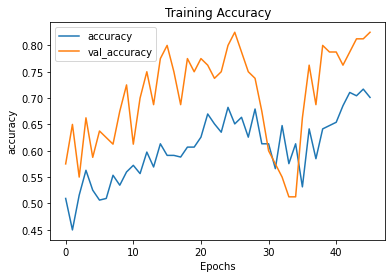

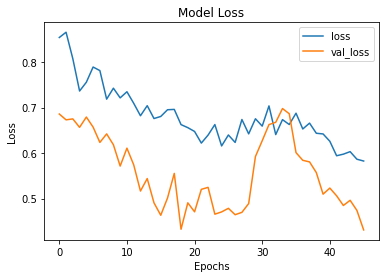

In [539]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)

pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot()
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")

pd.DataFrame(history.history)[["loss", "val_loss"]].plot()
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")